In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from datetime import datetime as dt # MOK
url='https://data.gov.lt/datasets/509/'
print(f'70 paskaita. Auto: {url}')
print('Pasiruošta',dt.now().replace(microsecond=0))

70 paskaita. Auto: https://data.gov.lt/datasets/509/
Pasiruošta 2024-12-19 18:29:35


In [ ]:
# /home/administratorius/git/python_kursai/gautiDuomenys/ei_2023_12_31.json
# /home/administratorius/git/python_kursai/DataScienceNotebooks/Studentai/MykolasOK/2024-12-18_ML_auto_stat.ipynb

path = '../../../gautiDuomenys/'
files = ['ei_2023_12_31.json', 'ei_2022_12_31.json', 'ei_2021_12_31.json', 'ei_2020_12_31.json', 'ei_2019_12_31.json','ei_2018_12_31.json','ei_2017_12_31.json','ei_2016_12_31.json','ei_2015_12_31.json','ei_2014_12_31.json','ei_2013_12_31.json']

dfs = []

for file in files:
        print(path+file)
        df = pd.read_json(path+file)
        dfs.append(df)
        print(df.head())

for df in dfs:
    df['metai'] = pd.to_datetime(df['dataLaikas']).dt.year

../../../gautiDuomenys/ei_2023_12_31.json
   registrokodas        dataLaikas  registravimoData  \
0  07-23-9588945  2023-01-01 00:27  2023-01-01 01:04   
1  07-23-9588946  2023-01-01 00:10  2023-01-01 01:04   
2  07-23-9588947  2023-01-01 00:38  2023-01-01 01:39   
3  07-23-9588948  2023-01-01 00:35  2023-01-01 01:58   
4  07-23-9588949  2022-12-31 23:53  2023-01-01 02:05   

  paskutinioRedagavimoLaikas  iskaitinis  \
0           2023-03-31 12:14           0   
1           2023-01-01 02:50           0   
2           2023-01-02 14:44           0   
3           2023-01-01 02:17           0   
4           2023-02-13 10:50           0   

                                          rusis  \
0                            Kiti eismo įvykiai   
1                                   Susidūrimas   
2  Susidūrimas su stovinčia transporto priemone   
3                            Kiti eismo įvykiai   
4  Susidūrimas su stovinčia transporto priemone   

                                schema1  \
0     

In [12]:
print(dfs[0].iloc[0])

registrokodas                                                       07-23-9588945
dataLaikas                                                       2023-01-01 00:27
registravimoData                                                 2023-01-01 01:04
paskutinioRedagavimoLaikas                                       2023-03-31 12:14
iskaitinis                                                                      0
rusis                                                          Kiti eismo įvykiai
schema1                                                        Kiti eismo įvykiai
schema2                                                        Kiti eismo įvykiai
dalyviuSkaicius                                                                 2
zuvusiuSkaicius                                                                 0
zuvVaiku                                                                        0
suzeistuSkaicius                                                                0
suzeistaVaiku   

In [35]:
print(dfs[0].iloc[0]['eismoDalyviai'][0])

{'dalyvisId': 48690423, 'kategorija': 'Kiti', 'dalyvioTipas': 'Kitas asmuo', 'pasisalino': 'Ne', 'asmuoNezinomas': 'Ne', 'lytis': 'Vyras', 'pilietybe': None, 'amzius': 50, 'neigalumas': 'Ne', 'saugosDirzas': None, 'vaikoKedesNaudojimas': None, 'saugosSalmoNaudojimas': None, 'oroPagalves': None, 'bukle': 'Nenukentėjo', 'detaliBukle': None, 'suzalojimoMastas': None, 'vairuotojoKvalifikacija': None, 'vairavimoStazas': None, 'busena': 'Blaivus', 'detaliBusena': None, 'papBusena': None, 'detaliPapBusena': None, 'kaltininkas': 'Taip', 'girtumasPromilemis': None, 'dalyvioBusena': 'KALTININKAS', 'teisenosStadijaBusena': 'ADMINISTRACINIS', 'dalyvioKetPazeidimai': ['Kiti Kelių eismo taisyklių pažeidimai'], 'tpId': None}


In [36]:
print(dfs[0].iloc[0]['eismoTranspPreimone'][0])

{'tpId': 33646065, 'regValstybe': 'Lietuva', 'kategorija': 'Keleivinis automobilis', 'klase': None, 'marke': 'AUDI', 'modelis': 'A6', 'pagaminimoMetai': None, 'pasisalino': None, 'ypatumai': None, 'apgadinimai': None, 'apgadinimaiKita': 'priekinis valst. Nr.', 'apdraustasCivilines': 1, 'apdraustasKasko': 0, 'fizinis': 'Taip', 'dalyvautiVTUzdrausta': 'Ne', 'nuliamiantysGedimai': [], 'pirminiaiSmugiai': ['Priekinis']}


In [45]:
for eismoDalyvis in dfs[0].iloc[0]['eismoDalyviai']: # eismoTranspPreimone
    print('-----------------')
    for x in eismoDalyvis:
        print(x,'___',eismoDalyvis[x])

-----------------
dalyvisId ___ 48690423
kategorija ___ Kiti
dalyvioTipas ___ Kitas asmuo
pasisalino ___ Ne
asmuoNezinomas ___ Ne
lytis ___ Vyras
pilietybe ___ None
amzius ___ 50
neigalumas ___ Ne
saugosDirzas ___ None
vaikoKedesNaudojimas ___ None
saugosSalmoNaudojimas ___ None
oroPagalves ___ None
bukle ___ Nenukentėjo
detaliBukle ___ None
suzalojimoMastas ___ None
vairuotojoKvalifikacija ___ None
vairavimoStazas ___ None
busena ___ Blaivus
detaliBusena ___ None
papBusena ___ None
detaliPapBusena ___ None
kaltininkas ___ Taip
girtumasPromilemis ___ None
dalyvioBusena ___ KALTININKAS
teisenosStadijaBusena ___ ADMINISTRACINIS
dalyvioKetPazeidimai ___ ['Kiti Kelių eismo taisyklių pažeidimai']
tpId ___ None
-----------------
dalyvisId ___ 48690422
kategorija ___ Automobilio vairuotojas
dalyvioTipas ___ None
pasisalino ___ Taip
asmuoNezinomas ___ Taip
lytis ___ None
pilietybe ___ None
amzius ___ None
neigalumas ___ None
saugosDirzas ___ None
vaikoKedesNaudojimas ___ None
saugosSalmoNaudoj

In [46]:
for eismoTranspPreimone in dfs[0].iloc[0]['eismoTranspPreimone']: # eismoTranspPreimone, eismoDalyviai
    print('-----------------')
    for x in eismoTranspPreimone:
        print(x,'___',eismoTranspPreimone[x])

-----------------
tpId ___ 33646065
regValstybe ___ Lietuva
kategorija ___ Keleivinis automobilis
klase ___ None
marke ___ AUDI
modelis ___ A6
pagaminimoMetai ___ None
pasisalino ___ None
ypatumai ___ None
apgadinimai ___ None
apgadinimaiKita ___ priekinis valst. Nr.
apdraustasCivilines ___ 1
apdraustasKasko ___ 0
fizinis ___ Taip
dalyvautiVTUzdrausta ___ Ne
nuliamiantysGedimai ___ []
pirminiaiSmugiai ___ ['Priekinis']


In [55]:
def dien_metas(i):
    if i >= 0 and i<=6:
        return 'Naktis'
    elif i >= 7 and i<=10:
        return 'Rytas'
    elif i >= 11 and i<=12:
        return 'Priešpietė'
    elif i >= 13 and i<=14:
        return 'Pietūs'
    elif i >= 15 and i<=16:
        return 'Pavakarė'
    elif i >= 19 and i<=22:
        return 'Vakaras'
    elif i == 23:
        return 'Naktis'
    
def lytis(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['lytis']
        
def amzius(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['amzius']

def girtumas(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['girtumasPromilemis']

def vairavimoStazas(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['vairavimoStazas']

def vaikoKedesNaudojimas(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['vaikoKedesNaudojimas']

def saugosDirzas(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['saugosDirzas']

def pasisalino(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['pasisalino']

for df in dfs:
    print(f'------------------- {len(df)} eil.')
    df['dataLaikas'] = pd.to_datetime(df['dataLaikas'])
    # df['V'] = df['dataLaikas'].dt.hour
    # df['Dienos_metas'] = df['V'].apply(dien_metas)
    
    # Sukuriame stulpelį minutėms nuo dienos pradžios
    df['minutes_since_midnight'] = df['dataLaikas'].dt.hour * 60 + df['dataLaikas'].dt.minute

    # Sukuriame stulpelį dienoms nuo metų pradžios
    df['days_since_new_year'] = df['dataLaikas'].dt.dayofyear

    df['lytis'] = df['eismoDalyviai'].apply(lytis)
    df['girtumas'] = df['eismoDalyviai'].apply(girtumas)
    df['amzius'] = df['eismoDalyviai'].apply(amzius)
    df['vairavimoStazas'] = df['eismoDalyviai'].apply(vairavimoStazas)
    df['vaikoKedesNaudojimas'] = df['eismoDalyviai'].apply(vaikoKedesNaudojimas)
    df['saugosDirzas'] = df['eismoDalyviai'].apply(saugosDirzas)
    df['pasisalino'] = df['eismoDalyviai'].apply(pasisalino)

    df['kategorija'] = df['eismoTranspPreimone'][0][0]['kategorija']
    df['marke'] = df['eismoTranspPreimone'][0][0]['marke']
    df['pagaminimoMetai'] = df['eismoTranspPreimone'][0][0]['pagaminimoMetai']
    df['pasisalino'] = df['eismoTranspPreimone'][0][0]['pasisalino']
    df['apdraustasCivilines'] = df['eismoTranspPreimone'][0][0]['apdraustasCivilines']
    df['apdraustasKasko'] = df['eismoTranspPreimone'][0][0]['apdraustasKasko']


------------------- 24240 eil.
------------------- 23520 eil.
------------------- 23707 eil.
------------------- 23022 eil.
------------------- 28416 eil.
------------------- 24703 eil.
------------------- 21124 eil.
------------------- 21935 eil.
------------------- 20646 eil.
------------------- 20430 eil.
------------------- 21946 eil.


In [56]:
# df['eismoTranspPreimone'][0][0]['kategorija']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21946 entries, 0 to 21945
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   registrokodas                 21946 non-null  object        
 1   dataLaikas                    21946 non-null  datetime64[ns]
 2   registravimoData              21946 non-null  object        
 3   paskutinioRedagavimoLaikas    21297 non-null  object        
 4   iskaitinis                    21946 non-null  int64         
 5   rusis                         21297 non-null  object        
 6   schema1                       21297 non-null  object        
 7   schema2                       21297 non-null  object        
 8   dalyviuSkaicius               21297 non-null  float64       
 9   zuvusiuSkaicius               21946 non-null  int64         
 10  zuvVaiku                      3 non-null      float64       
 11  suzeistuSkaicius            

In [34]:
for df in dfs:
    print('-------------------')
    print(df.info())

In [ ]:
import pandas as pd

def merge_dataframes(dfs, fields=None):
    """
    Funkcija apjungia DataFrame sąrašą į vieną DataFrame.
    
    Parametrai:
    dfs (list of DataFrame): Sąrašas DataFrame objektų, kuriuos reikia apjungti.
    fields (list of str, optional): Laukų, kuriuos reikia ištraukti iš kiekvieno DataFrame, sąrašas.
                                   Jei nenurodytas, apjungiami visi laukai.
    
    Grąžina:
    DataFrame: Apjungtas DataFrame.
    """
    if fields is not None:
        # Filtruoja tik nurodytus laukus kiekviename DataFrame
        dfs = [df[fields] for df in dfs if all(field in df for field in fields)]
    return pd.concat(dfs, ignore_index=True)

# Funkcijos merge_dataframes() testavimui:

# Sukurkite pavyzdinius DataFrame objektus
# df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
# df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
# df3 = pd.DataFrame({'A': [9, 10], 'B': [11, 12]})

# Sukurkite sąrašą DataFrame objektų
# dfs = [df1, df2, df3]

# Sukurkite naują DataFrame, apjungiant visus df iš sąrašo, galima nurodyti norimus laukus
# merged_df = merge_dataframes(dfs, fields=['A', 'B'])

# Atspausdinti apjungtą DataFrame
# print(merged_df)


In [ ]:
fields_to_merge=['A', 'B']
merged_df = merge_dataframes(dfs, fields=fields_to_merge)

    Metai  Dalyviu_skaicius
0    2021             40012
1    2022             39895
2    2023             40981
3    2015             35425
4    2016             37443
5    2020             38655
6    2019             48704
7    2017             36998
8    2018             42382
9    2011                83
10   2014             35106
11   2012               209
12   2013             37139
13   2010                15


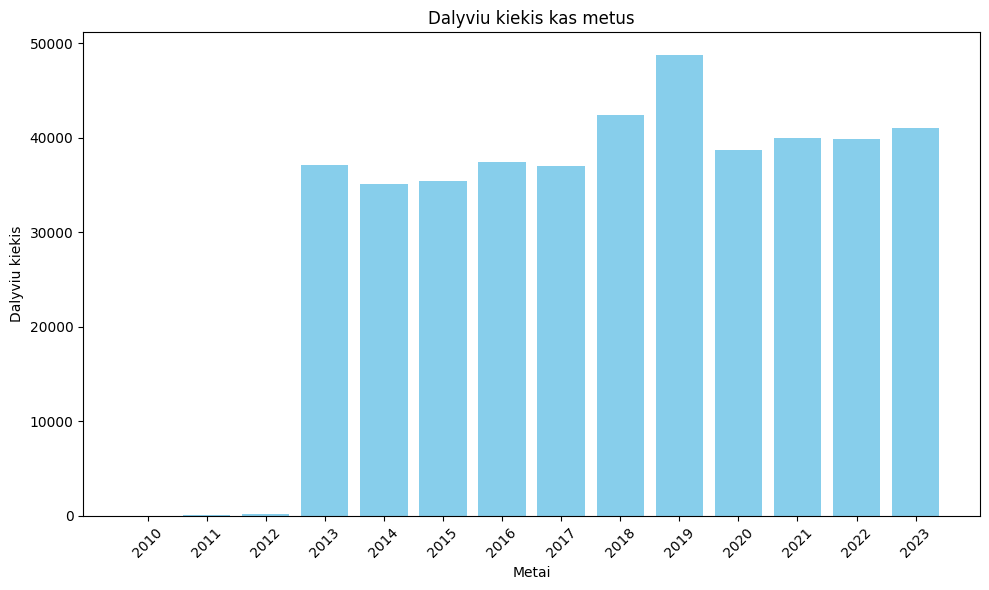

In [17]:
dalyviu_per_metus = {}

for df in dfs:
    df['dalyviu_skaicius'] = df['eismoDalyviai'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df = df[df['metai'] != 1899]
    yearly_data = df.groupby('metai')['dalyviu_skaicius'].sum()
    
    for year, count in yearly_data.items():
        if year in dalyviu_per_metus:
            dalyviu_per_metus[year] += count
        else:
            dalyviu_per_metus[year] = count

dalyviu_per_metus_df = pd.DataFrame(list(dalyviu_per_metus.items()), columns=['Metai', 'Dalyviu_skaicius'])

print(dalyviu_per_metus_df)

plt.figure(figsize=(10,6))
plt.bar(dalyviu_per_metus_df['Metai'], dalyviu_per_metus_df['Dalyviu_skaicius'], color='skyblue')
plt.title('Dalyviu kiekis kas metus')
plt.xlabel('Metai')
plt.ylabel('Dalyviu kiekis')
plt.xticks(dalyviu_per_metus_df['Metai'], rotation=90)
plt.tight_layout()
plt.show()